In [3]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [15]:
with sqlite3.connect("../db.sqlite3") as connection:
    df_order = pd.read_sql_query("SELECT * FROM restaurant_order", connection)
    df_orderitem = pd.read_sql_query("SELECT * FROM restaurant_orderitem", connection)
    df_product = pd.read_sql_query("SELECT * FROM restaurant_product", connection)
merged_df = df_product.merge(
    df_orderitem, 
    left_on="id", 
    right_on="product_id"
).merge(
    df_order, 
    left_on="order_id", 
    right_on="id"
    )
merged_df.to_csv("data.csv", index=False)
df = pd.read_csv("data.csv")
df

,id_x,price,name,id_y,quantity,order_id,product_id,id,datetime
0,1,0.50,Mint Sauce,44,2,9,1,9,2019-08-03 19:28:00
1,1,0.50,Mint Sauce,60,2,11,1,11,2019-08-03 19:25:00
2,1,0.50,Mint Sauce,80,1,14,1,14,2019-08-03 18:36:00
3,1,0.50,Mint Sauce,106,1,19,1,19,2019-08-03 18:00:00
4,1,0.50,Mint Sauce,113,1,20,1,20,2019-08-03 17:58:00
...,...,...,...,...,...,...,...,...,...
74813,248,17.95,House white wine 75cl,74785,1,10879,248,10879,2017-02-09 20:47:00
74814,248,17.95,House white wine 75cl,74786,1,5409,248,5409,2017-01-20 18:39:00
74815,248,17.95,House white wine 75cl,74789,1,5423,248,5423,2017-01-03 19:27:00
74816,248,17.95,House white wine 75cl,74810,1,11284,248,11284,2016-07-31 12:49:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

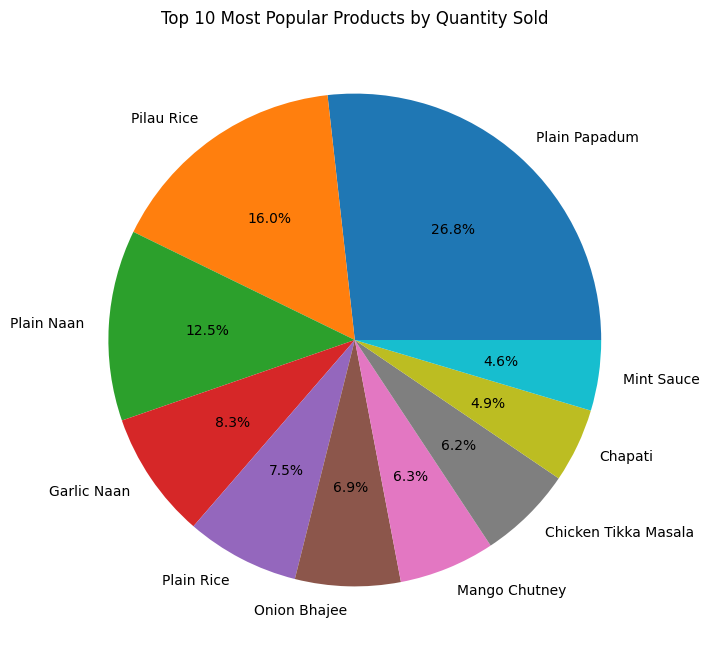

In [18]:
product_sales = df.groupby("name")["quantity"].sum().reset_index()
top_10_products = product_sales.sort_values(by="quantity", ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(
    top_10_products["quantity"], 
    labels=top_10_products["name"], 
    autopct="%1.1f%%"
)
plt.title("Top 10 Most Popular Products by Quantity Sold")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

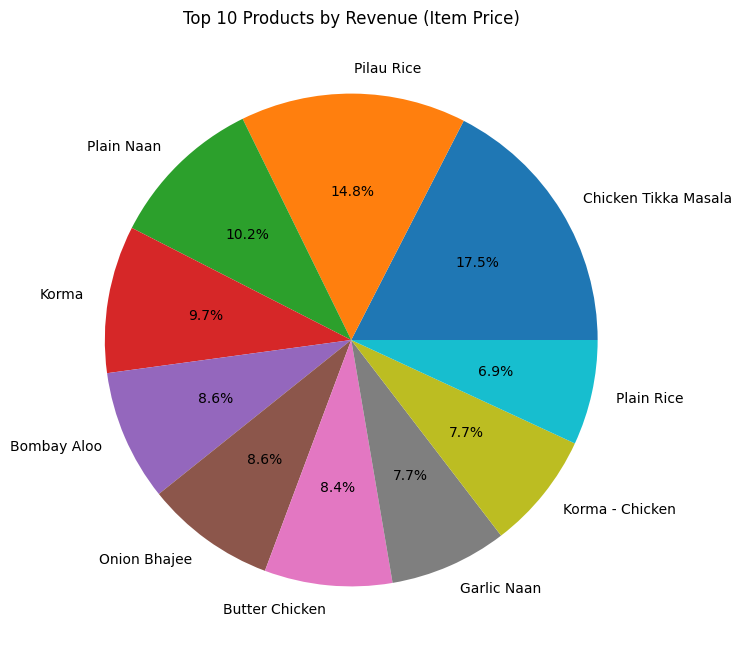

In [20]:
df["item_price"] = df["price"] * df["quantity"]
product_revenue = df.groupby("name")["item_price"].sum().reset_index()

top_10_products_by_revenue = product_revenue.sort_values(by="item_price", ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(
    top_10_products_by_revenue["item_price"], 
    labels=top_10_products_by_revenue["name"], 
    autopct="%1.1f%%", 
)
plt.title("Top 10 Products by Revenue (Item Price)")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

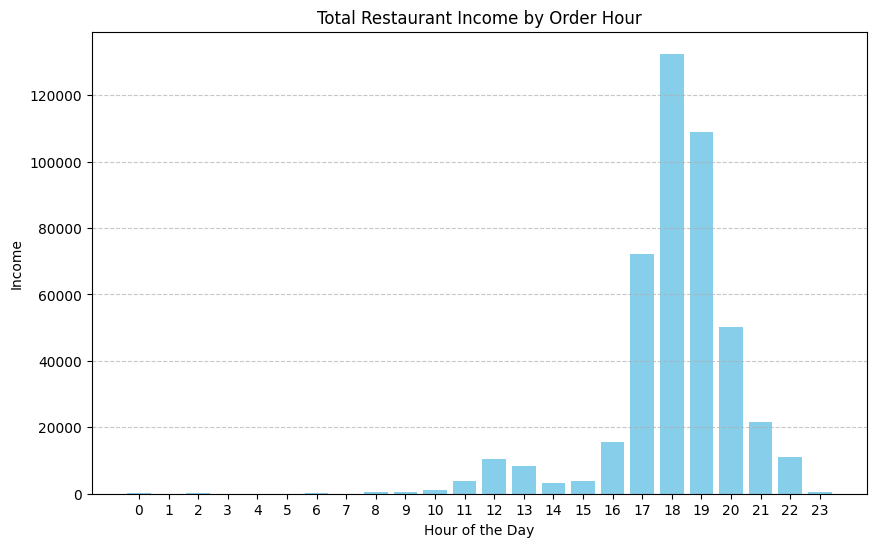

In [25]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["order_hour"] = df["datetime"].dt.hour

hourly_income = df.groupby("order_hour")["item_price"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(hourly_income["order_hour"], hourly_income["item_price"], color='skyblue')
plt.xlabel("Hour of the Day")
plt.ylabel("Income")
plt.title("Total Restaurant Income by Order Hour")
plt.xticks(range(0, 24))
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

In [24]:
df

,id_x,price,name,id_y,quantity,order_id,product_id,id,datetime,item_price,order_hour
0,1,0.50,Mint Sauce,44,2,9,1,9,2019-08-03 19:28:00,1.00,19
1,1,0.50,Mint Sauce,60,2,11,1,11,2019-08-03 19:25:00,1.00,19
2,1,0.50,Mint Sauce,80,1,14,1,14,2019-08-03 18:36:00,0.50,18
3,1,0.50,Mint Sauce,106,1,19,1,19,2019-08-03 18:00:00,0.50,18
4,1,0.50,Mint Sauce,113,1,20,1,20,2019-08-03 17:58:00,0.50,17
...,...,...,...,...,...,...,...,...,...,...,...
74813,248,17.95,House white wine 75cl,74785,1,10879,248,10879,2017-02-09 20:47:00,17.95,20
74814,248,17.95,House white wine 75cl,74786,1,5409,248,5409,2017-01-20 18:39:00,17.95,18
74815,248,17.95,House white wine 75cl,74789,1,5423,248,5423,2017-01-03 19:27:00,17.95,19
74816,248,17.95,House white wine 75cl,74810,1,11284,248,11284,2016-07-31 12:49:00,17.95,12


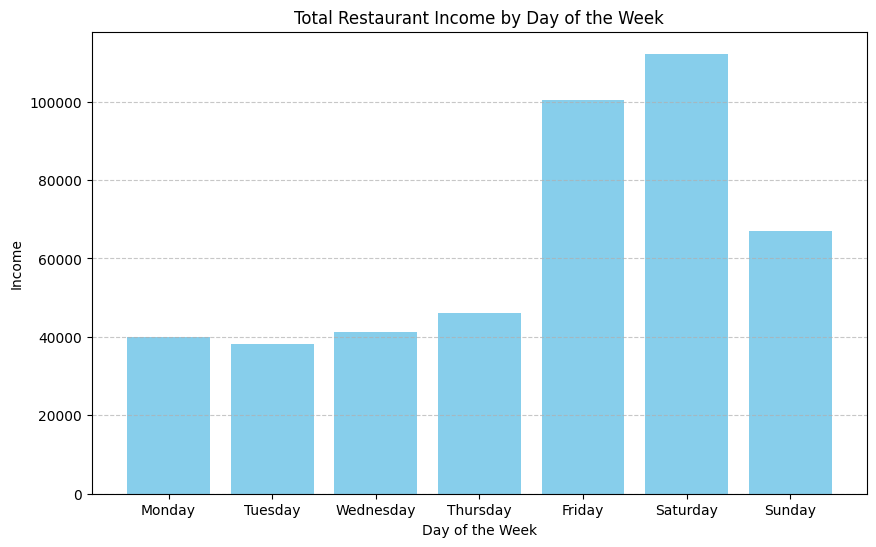

In [28]:
df["order_day_of_week"] = df["datetime"].dt.day_name()

weekly_income = df.groupby("order_day_of_week")["item_price"].sum().reset_index()

weekly_income["order_day_of_week"] = pd.Categorical(weekly_income["order_day_of_week"], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
weekly_income = weekly_income.sort_values("order_day_of_week")

plt.figure(figsize=(10, 6))
plt.bar(weekly_income["order_day_of_week"], weekly_income["item_price"], color="skyblue")
plt.xlabel("Day of the Week")
plt.ylabel("Income")
plt.title("Total Restaurant Income by Day of the Week")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()